In [ ]:
# using tutorial: https://www.youtube.com/watch?v=D9sU1hLT0QY

In [6]:
#never worked from within jupyter
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==1.15.0
ERROR: No matching distribution found for tensorflow-gpu==1.15.0


In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C, DDPG, DQN, HER, PPO, SAC, TD3

# Processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# for getting data from yfinance
import datetime as dt
import yfinance as yf
import pandas_datareader as web

In [2]:
# Uses yahoo finance but can be adapted to use csvs from the csv creator

years = 4
start = dt.datetime.now() - dt.timedelta(days=365*years)
end = dt.datetime.now()

df = web.get_data_yahoo('VET-USD', start, end)
print(len(df))
#df.drop(columns=['Open', 'Adj Close'], inplace=True)
df = df[['Close', 'High', 'Low', 'Open', 'Adj Close', 'Volume']]
df.head()

1185


,Close,High,Low,Open,Adj Close,Volume
Date,,,,,,
2018-08-03,0.015307,0.015730,0.014938,0.015041,0.015307,46250600.0
2018-08-04,0.013333,0.015944,0.012377,0.015218,0.013333,27059500.0
2018-08-05,0.014081,0.014296,0.012696,0.013428,0.014081,19746000.0
2018-08-06,0.013424,0.014308,0.012930,0.013963,0.013424,18774100.0
2018-08-07,0.012899,0.014457,0.012163,0.013315,0.012899,21022400.0


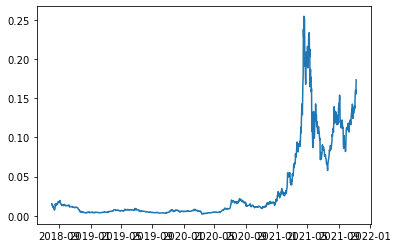

In [25]:
plt.plot(df['Adj Close'])
plt.show()

In [3]:
# frame_bound must start with window size, and frame_bound must be divisible by window_size
# (e.g. frame_bound=(5,100) can have window_size=n where n divides evenly into 100-5)
env = gym.make('stocks-v0', df=df, frame_bound=(5,500), window_size=5)
env.signal_features[0:5]

array([[ 0.015307,  0.      ],
       [ 0.013333, -0.001974],
       [ 0.014081,  0.000748],
       [ 0.013424, -0.000657],
       [ 0.012899, -0.000525]])

info {'total_reward': -0.009455002844333649, 'total_profit': 0.04477328947711147, 'position': 0}


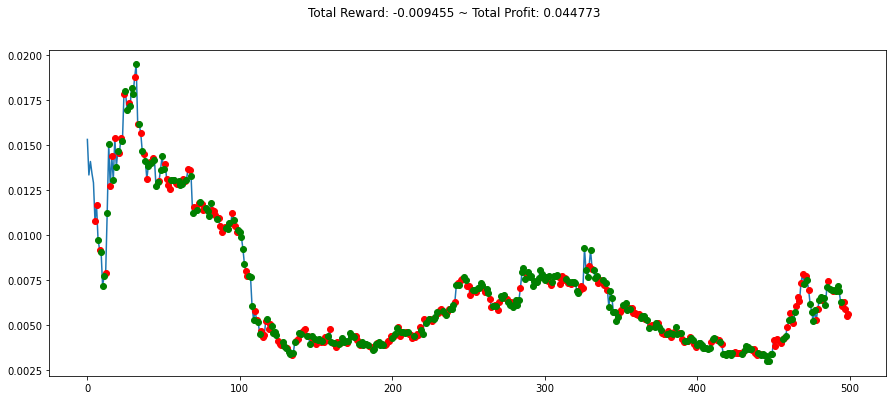

In [4]:
# create environment, and run through making random trades-
# (hence action_space.sample())
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [5]:
# training!
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,500), window_size=5)
env = DummyVecEnv([env_maker])

In [8]:
model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=100000) # change this to train for longer or shorter

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 3438 |
|    iterations      | 1    |
|    time_elapsed    | 0    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 2333        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005980905 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.692      |
|    explained_variance   | -0.524      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0145      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.000693   |
|    value_loss           | 1.75e-06    |
-----------------------------------------
-----------------

------------------------------------------
| time/                   |              |
|    fps                  | 1814         |
|    iterations           | 13           |
|    time_elapsed         | 14           |
|    total_timesteps      | 26624        |
| train/                  |              |
|    approx_kl            | 0.0031610588 |
|    clip_fraction        | 0.00361      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.511       |
|    explained_variance   | 0.196        |
|    learning_rate        | 0.0003       |
|    loss                 | -0.00418     |
|    n_updates            | 120          |
|    policy_gradient_loss | 1.68e-05     |
|    value_loss           | 4.47e-07     |
------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1806         |
|    iterations           | 14           |
|    time_elapsed         | 15           |
|    total_

-----------------------------------------
| time/                   |             |
|    fps                  | 1757        |
|    iterations           | 24          |
|    time_elapsed         | 27          |
|    total_timesteps      | 49152       |
| train/                  |             |
|    approx_kl            | 0.006424294 |
|    clip_fraction        | 0.0189      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.517      |
|    explained_variance   | 0.125       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.018       |
|    n_updates            | 230         |
|    policy_gradient_loss | -0.00146    |
|    value_loss           | 5.18e-07    |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 1755        |
|    iterations           | 25          |
|    time_elapsed         | 29          |
|    total_timesteps      | 51200 

-----------------------------------------
| time/                   |             |
|    fps                  | 1744        |
|    iterations           | 35          |
|    time_elapsed         | 41          |
|    total_timesteps      | 71680       |
| train/                  |             |
|    approx_kl            | 0.001652112 |
|    clip_fraction        | 0.00542     |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.252      |
|    explained_variance   | -0.249      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.00443     |
|    n_updates            | 340         |
|    policy_gradient_loss | -0.000526   |
|    value_loss           | 1.96e-07    |
-----------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1741         |
|    iterations           | 36           |
|    time_elapsed         | 42           |
|    total_timesteps      | 7

-------------------------------------------
| time/                   |               |
|    fps                  | 1740          |
|    iterations           | 46            |
|    time_elapsed         | 54            |
|    total_timesteps      | 94208         |
| train/                  |               |
|    approx_kl            | 0.00063321705 |
|    clip_fraction        | 0.0021        |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.162        |
|    explained_variance   | -1.14         |
|    learning_rate        | 0.0003        |
|    loss                 | -0.00162      |
|    n_updates            | 450           |
|    policy_gradient_loss | -4.18e-05     |
|    value_loss           | 8.58e-08      |
-------------------------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 1740         |
|    iterations           | 47           |
|    time_elapsed         | 55      

[[-1.0961742   0.4442257 ]
 [ 0.54267716 -0.4950811 ]
 [-0.12068638 -0.08954617]
 [ 0.05347935  0.43487245]
 [-0.8418923  -0.4685341 ]]
info {'total_reward': 0.0012819988187402487, 'total_profit': 0.972421426527295, 'position': 0}


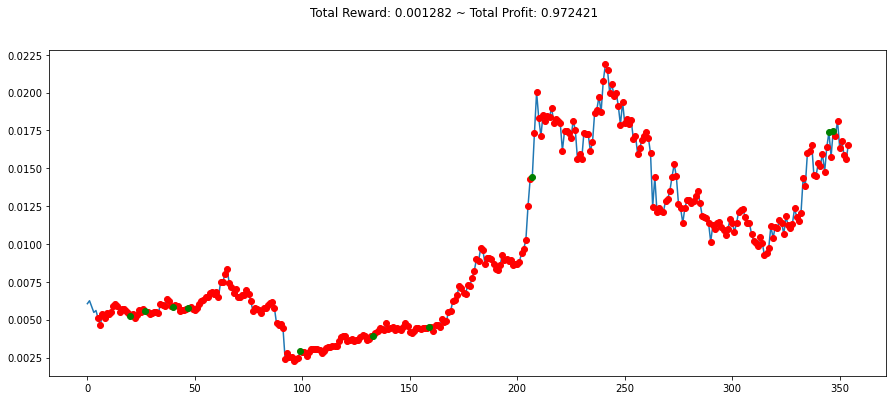

In [17]:
# Evaluation - Evaluated on data that was not used to train the model to test its efficacy
env = gym.make('stocks-v0', df=df, frame_bound=(500,850), window_size=5)
obs = env.reset()
#print(obs)
#print(obs.shape)
print(env.observation_space.sample())
while True:
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print('info', info)
        break
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()